<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/preprocessing_and_decomposition/Empirical_wavelet_transform_(EWT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Empirical wavelet transform (EWT)


## Introduction

The empirical wavelet transform (EWT) is a technique that creates a multiresolution analysis (MRA) of a signal using an adaptive wavelet subdivision scheme. The EWT starts with a segmentation of the signal's spectrum. The EWT provides perfect reconstruction of the input signal. The EWT coefficients partition the energy of the input signal into separate passbands.

The EWT was developed by Gilles [1]. Gilles and Heal [2] proposed and use a histogram-based approach for segmenting the spectrum.

An MRA is a decomposition of a signal into components on different scales, or equivalently, on different frequency bands in such a way that the original signal is recovered by summing the components at each point in time (see Practical Introduction to Multiresolution Analysis). Many MRA techniques exist. The maximal overlap discrete wavelet transform (MODWT) and its associated MRA formulation use a basis or frame designed independently of the signal (see modwt and modwtmra). The empirical mode decomposition (EMD) algorithm is a data-adaptive technique that decomposes a nonlinear or nonstationary process into its intrinsic modes of oscillation. The EMD iterates on an input signal to extract natural AM-FM modes, also known as intrinsic mode functions, contained in the data (see emd).

## Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
## example data importing
data = pd.read_csv('https://raw.githubusercontent.com/iotanalytics/IoTTutorial/main/data/SCG_data.csv').drop('Unnamed: 0',1).to_numpy()[0,:1000]

In [ ]:
!pip install ewtpy

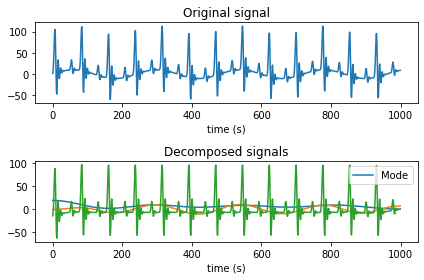

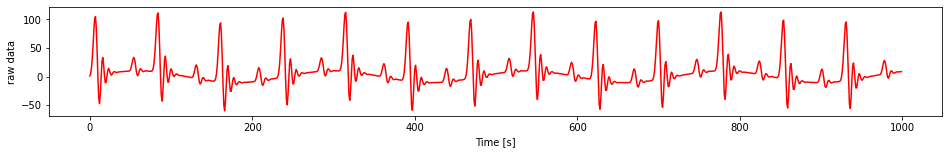

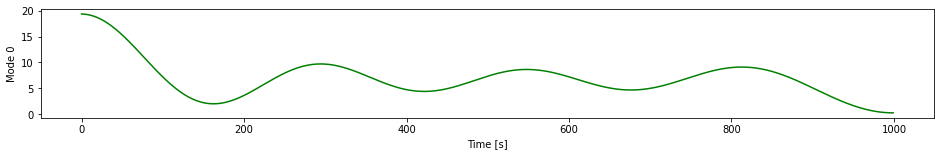

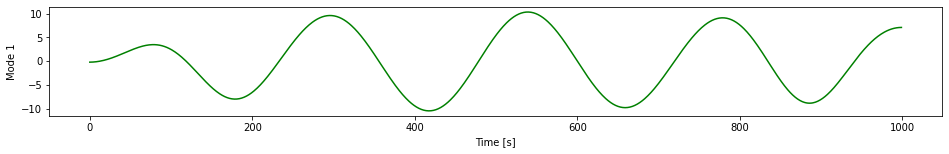

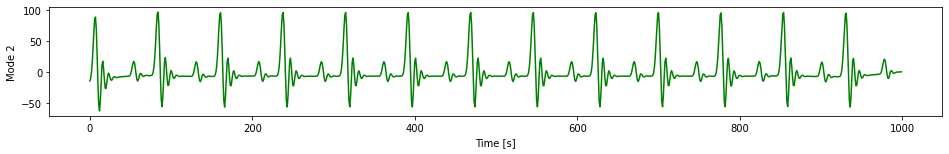

In [ ]:
#%% Example script
import numpy as np
import matplotlib.pyplot as plt
import ewtpy

T = 1000
t = np.arange(1,T+1)/T
f = np.cos(2*np.pi*0.8*t) + 2*np.cos(2*np.pi*10*t)+0.8*np.cos(2*np.pi*100*t)

T = 100
f = data


ewt,  mfb ,boundaries = ewtpy.EWT1D(f, N = 3)

plt.figure()
plt.subplot(2,1,1)
plt.plot(f)
plt.title('Original signal')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(ewt)
plt.title('Decomposed signals')
plt.xlabel('time (s)')
plt.legend(['Mode'])
plt.tight_layout()


# Plot raw
plt.figure(figsize=(16,2))
plt.plot(f, 'r')
plt.xlabel("Time [s]")
plt.ylabel("raw data")
plt.show()

# Plot results
for i in range(ewt.shape[1]):
 #   plt.subplot(nIMFs+1, 1, n+2)
    plt.figure(figsize=(16,2))
    plt.plot(ewt[:,i], 'g')
    plt.xlabel("Time [s]")
    plt.ylabel("Mode %i" %(i))
    plt.locator_params(axis='y', nbins=5)
    plt.show()

## Discussion
Pros:

Compared with EMD, it has amore consistent decomposition and a rigorous theoretical foundations. 

It combines the advantages of Fourier analysis and wavelet theory to extract the different modes in a complicated signal.

Cons:

Needed of proper combination of wavelets.

Higher computational complexity.

Needs of pre-determine number of modes.


##Reference
[1] Gilles, Jérôme. “Empirical Wavelet Transform.” IEEE Transactions on Signal Processing 61, no. 16 (August 2013): 3999–4010. https://doi.org/10.1109/TSP.2013.2265222.

[2] Gilles, Jérôme, and Kathryn Heal. “A Parameterless Scale-Space Approach to Find Meaningful Modes in Histograms — Application to Image and Spectrum Segmentation.” International Journal of Wavelets, Multiresolution and Information Processing 12, no. 06 (November 2014): 1450044. https://doi.org/10.1142/S0219691314500441.